In [1]:
# Auto-reload (Kodu değiştirirsen notebook'u kapatıp açmana gerek kalmaz)
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Grafik ayarları
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Bir üst dizine çıkıp data klasörünü bulmamız lazım
data_path = "../data/raw/transactions.csv"
df = pd.read_csv(data_path)

# Zaman sütununu datetime objesine çevir
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Veri Seti Boyutu: {df.shape}")
df.head()

Veri Seti Boyutu: (10000, 5)


,timestamp,customer_id,merchant,amount,is_fraud
0,2025-11-19 18:32:03.663031,CUST_0103,online_subscription,43.516897,0
1,2025-11-19 18:31:03.663031,CUST_0436,supermarket,41.756770,0
2,2025-11-19 18:30:03.663031,CUST_0861,supermarket,40.498642,0
3,2025-11-19 18:29:03.663031,CUST_0271,supermarket,48.013149,0
4,2025-11-19 18:28:03.663031,CUST_0107,gas_station,259.153011,1


Fraud Oranı: %5.00


C:\Users\Talha Kaya\AppData\Local\Temp\ipykernel_53104\2699306978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_fraud', palette=['#1f77b4', '#d62728'])


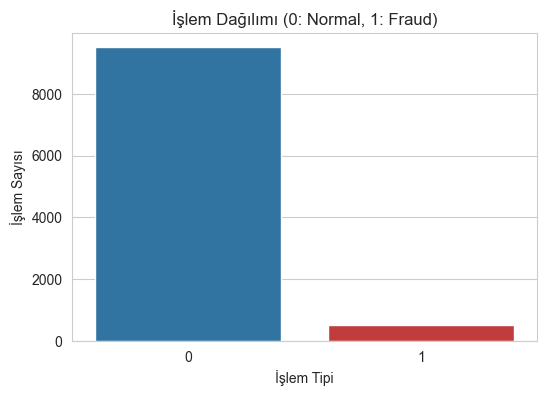

In [3]:
# Fraud vs Normal dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_fraud', palette=['#1f77b4', '#d62728'])
plt.title("İşlem Dağılımı (0: Normal, 1: Fraud)")
plt.xlabel("İşlem Tipi")
plt.ylabel("İşlem Sayısı")

# Oranları yazdır
fraud_ratio = df['is_fraud'].mean() * 100
print(f"Fraud Oranı: %{fraud_ratio:.2f}")
plt.show()

C:\Users\Talha Kaya\AppData\Local\Temp\ipykernel_53104\3836063584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_fraud', y='amount', palette=['#1f77b4', '#d62728'])


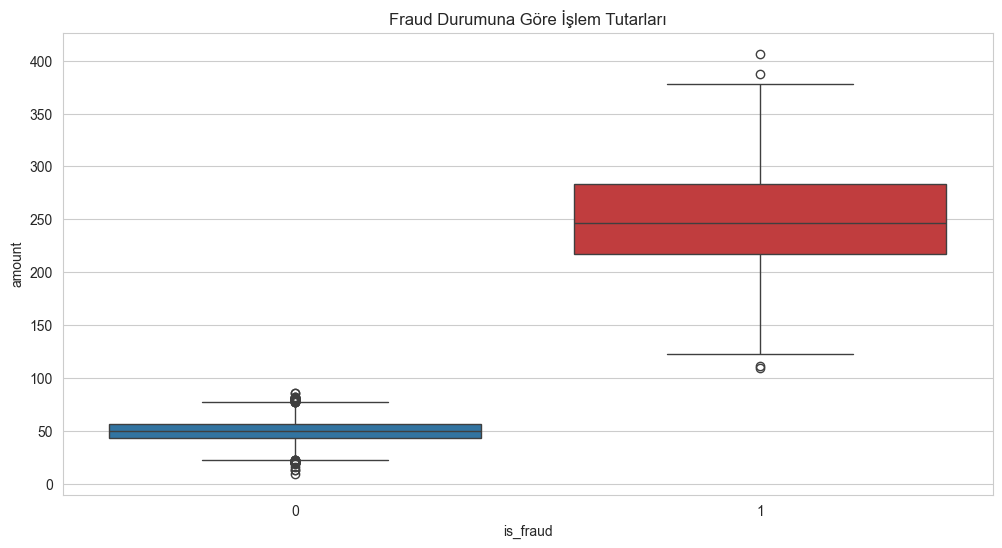

In [4]:
# Fraud olan ve olmayanların tutar dağılımı
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_fraud', y='amount', palette=['#1f77b4', '#d62728'])
plt.title("Fraud Durumuna Göre İşlem Tutarları")
plt.show()

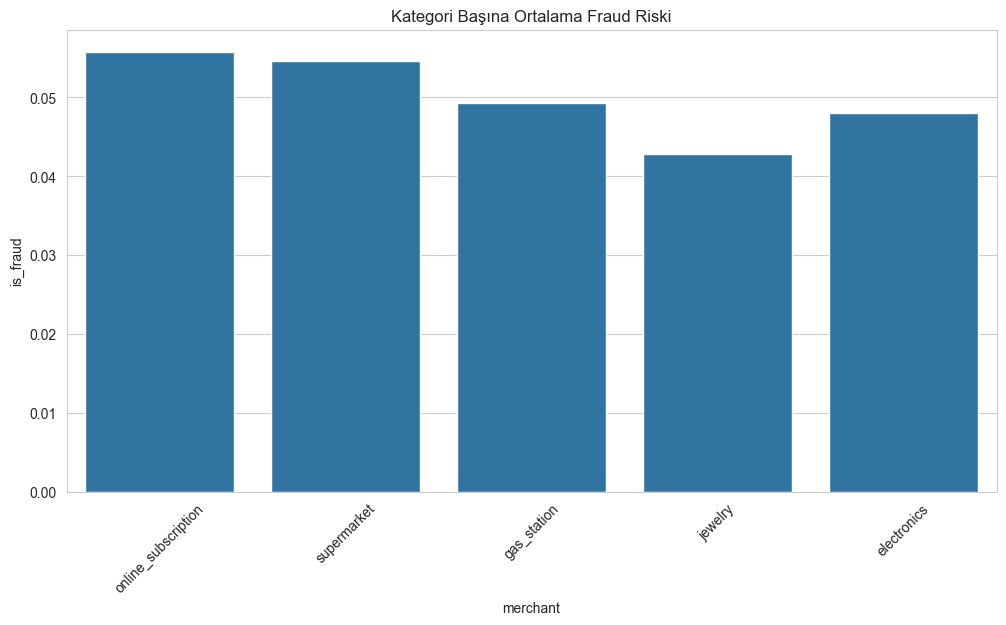

In [5]:
# Kategorilere göre fraud oranları
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='merchant', y='is_fraud', errorbar=None)
plt.title("Kategori Başına Ortalama Fraud Riski")
plt.xticks(rotation=45)
plt.show()

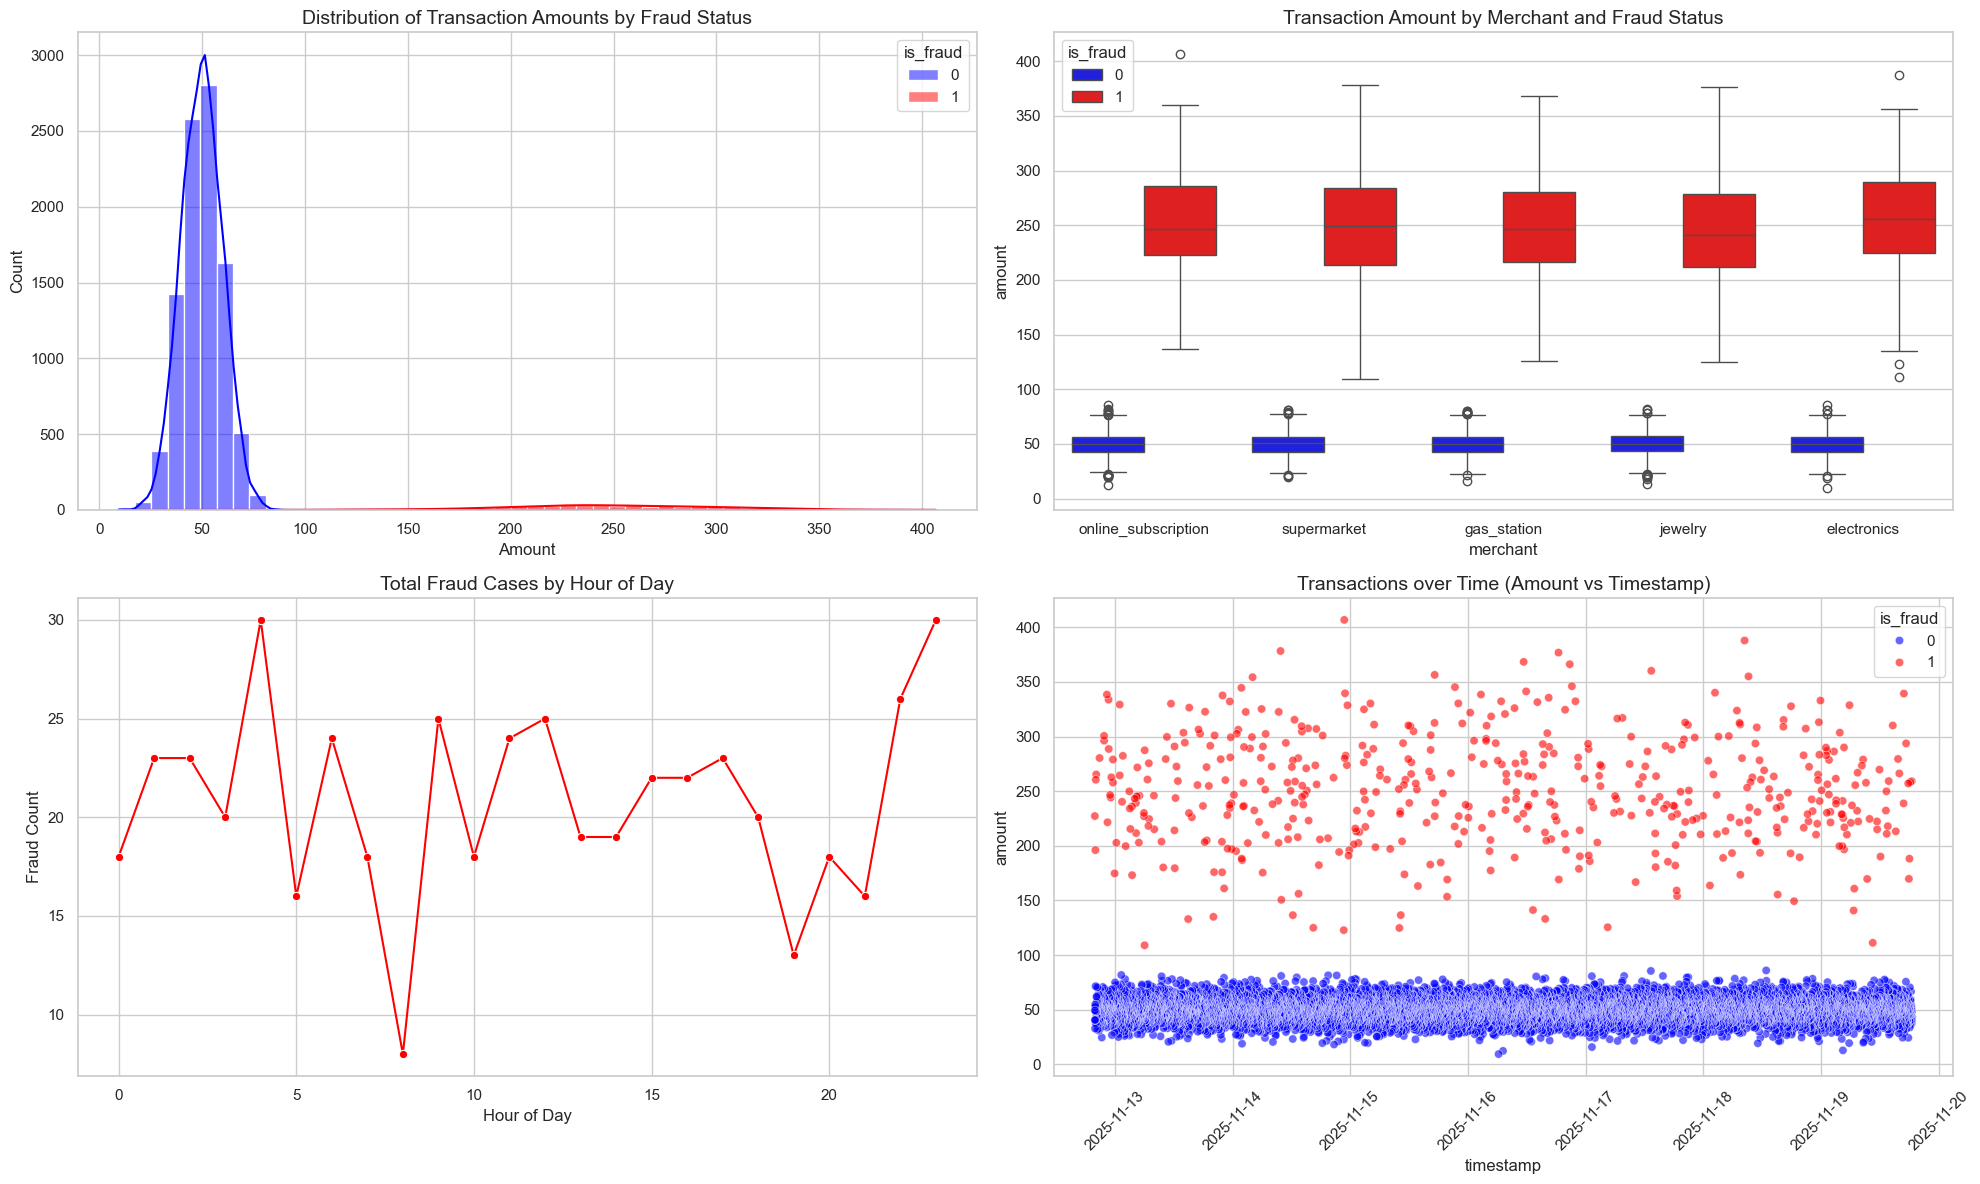

In [6]:
# Feature Engineering for Time
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Set up the plotting style (Professional/Kaggle style)
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# Plot 1: The "Smoking Gun" - Amount Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='amount', hue='is_fraud', kde=True, bins=50, palette=['blue', 'red'])
plt.title('Distribution of Transaction Amounts by Fraud Status', fontsize=14)
plt.xlabel('Amount')

# Plot 2: Amount vs Merchant (Boxplot)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='merchant', y='amount', hue='is_fraud', palette=['blue', 'red'])
plt.title('Transaction Amount by Merchant and Fraud Status', fontsize=14)

# Plot 3: Fraud over Time (Hourly aggregate)
plt.subplot(2, 2, 3)
hourly_fraud = df.groupby('hour')['is_fraud'].sum()
sns.lineplot(x=hourly_fraud.index, y=hourly_fraud.values, marker='o', color='red')
plt.title('Total Fraud Cases by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Count')

# Plot 4: Scatter Plot (Time vs Amount) - Detecting "Attacks"
# We convert time to a numerical value for plotting scatter
df['time_numeric'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='timestamp', y='amount', hue='is_fraud', palette=['blue', 'red'], alpha=0.6)
plt.title('Transactions over Time (Amount vs Timestamp)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('eda_summary.png')